<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/RecocidoSimulado_LBSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementación del algoritmo Recicido sumulado basado en listas (LBSA, por sus siglas en inglés) para el problema de TSP.

Referencia:

S.-h. Zhan, J. Lin, Z.-j. Zhang y Y.-w. Zhong, "List-Based Simulated Annealing Algorithm for Traveling Salesman Problem", Computational Intelligence and Neuroscience, vol. 2016, pp. 1–12, 2016. Accedido el 08 de noviembre de 2022. [En línea]. Disponible: https://doi.org/10.1155/2016/1712630

In [61]:
#esta celda se debe programar en un futuro para usarla cuando los grafos sean 
#no dirigidos, es decir, generalizar el algoritmo para otro tipo de problemas 

#verificad si dos nodos son adyacentes
def adyac(nodo, edg, is_fact):
  city_start = nodo[0][0]
  city_end = nodo[0][1]
  for i in range(len(edg)):
    if city_start == edg[i][0] and city_start == edg[i][1]:
      is_fact = True
      break
  return is_fact

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generar soluciones factibles
def gen_sol(n,edg):
  cand_sol = []
  #is_fact = False
  node = []
  #while is_fact == False:
  for i in range(n):
    cand_sol.append(i+1)
    #se crea una permutación
  random.shuffle(cand_sol)
  #city_inic = cand_sol[0]
  #cand_sol.append(city_inic)
    #verificar si la permutación es factible
    #for i in range(n-2):
     # node.append((cand_sol[i],cand_sol[i+1]))
      #is_fact = adyac(node,edg,is_fact)
  return cand_sol
  

In [3]:
def evaluar_funcion(sol, ejes):
  tot_ruta=0
  for i in range(len(sol)-1):
    city1 = sol[i]
    city2 = sol[i+1]
    for j in range(len(ejes)):
      if ejes[j][0] == city1 and ejes[j][1] == city2:
        tot_ruta=tot_ruta+ejes[j][2]
  return tot_ruta

In [39]:
#Producir lista inicial de temperaturas
def list_temp(sol, n, edges,p):
  sol_vec = sol.copy()
  #print(str(sol_vec))
  temperaturas_list = []
  i=0
  while i < n:
    #generar una solución candidata aleatoria vecina
    num_cambiar1 = random.randint(0,n-1)
    num_cambiar2 = num_cambiar1
    while num_cambiar2 == num_cambiar1:   #para evitar que se repitan los números aleatorios
      num_cambiar2 = random.randint(0,n-1)
    num_paso = sol_vec[num_cambiar1]
    sol_vec[num_cambiar1] = sol_vec[num_cambiar2]
    sol_vec[num_cambiar2] = num_paso
    #print(num_cambiar1)
    #print(str(num_cambiar2))
    #evaluar las funciones objetivo
    val_f_actual = evaluar_funcion(sol, edges)
    #print("Val actual")
    #print(val_f_actual)
    val_f_vec = evaluar_funcion(sol_vec,edges)
    #print("Val vecina")
    #print(val_f_vec)
    #print(str(sol_vec))
    if val_f_vec < val_f_actual:
      sol = sol_vec.copy()
      #print("nueva sol actual")
      #print(str(sol))
    dif = -(abs(val_f_vec - val_f_actual))
    log = np.log(p)
    #print(dif/log)
    t = -(abs(val_f_vec - val_f_actual))/np.log(p)
    #print("Temperatura")
    #print(t)
    temperaturas_list.append(t)
    i+=1
  return temperaturas_list


In [59]:
#Lista de adyacencia para representar el grafo ponderado
num_ciudades = 4
edges = [(1, 2, 10), (1, 3, 15), (1, 4, 20), (2, 3, 35),
            (2, 4, 25), (3, 4, 30),(2,1,10),(3,1,15),
            (4,1,20),(3,2,35),(4,2,25),(4,3,30)]
vals_rutas = []


#crear la lista de temperaturas 
sol_actual = gen_sol(num_ciudades, edges)
tam_list_temp = num_ciudades
p_0 = 0.99
i=0
print("Solución inicial: ")
print(str(sol_actual))
Lt = list_temp(sol_actual, tam_list_temp,edges,p_0)
Lt.sort(reverse=True)
print(str(Lt))

#algoritmo Recocido simulado 
K_max = 10
M = 10
k =0
sol_cand = []
while k <= K_max:
  temp = Lt[0]
  k+=1
  t=0
  c=0
  m=0
  while m < M:
    sol_cand = sol_actual.copy()
    num_cambiar1 = random.randint(0,num_ciudades-1)
    num_cambiar2 = num_cambiar1
    while num_cambiar1 == num_cambiar2:
      num_cambiar1 = random.randint(0,num_ciudades-1)
    num_paso = sol_cand[num_cambiar1]
    sol_cand[num_cambiar1] = sol_cand[num_cambiar2]
    sol_cand[num_cambiar2] = num_paso
    #print(str(sol_cand))
    #incrementamos Markov
    m+=1
    #evaluar las funciones objetivo
    val_f_actual = evaluar_funcion(sol_actual, edges)
    val_f_cand = evaluar_funcion(sol_cand,edges)
    #print("Val actual ")
    #print(val_f_actual)
    #print("Val candi")
    #print(val_f_cand)
    
    if val_f_cand < val_f_actual:
      sol_actual = sol_cand.copy()
    #print(str(Lt))
    t_max = Lt[0]
    #print("dif")
    dif = -(val_f_cand - val_f_actual)
    #print(dif)
    expo = np.exp(dif/t_max)
    #print('expon ')
    #print(expo)
    p = np.exp(dif/t_max)
    r = random.random()
    if r < p:
      t = t - (val_f_cand - val_f_actual)/np.log(r)
      c+=1
  
  if c != 0:
    Lt.append(t)
    t = t/c
    Lt.append(t)
    Lt.sort(reverse=True)
    #print(str(Lt))
  vals_rutas.append(val_f_actual)
print("La mejor solución encontrada: ") 
print(str(sol_actual))
print("Valor de la trayectoria: ")
print(val_f_actual)


Solución inicial: 
[2, 4, 1, 3]
[1492.4874371013311, 994.9916247342207, -0.0, -0.0]
La mejor solución encontrada: 
[4, 2, 1, 3]
Valor de la trayectoria: 
50


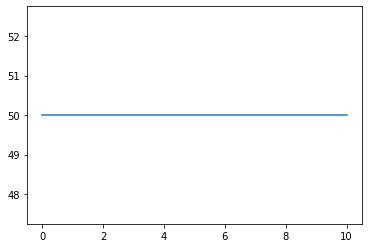

In [60]:
gen = []
for i in range(len(vals_rutas)):
  gen.append(i)
plt.plot(gen,vals_rutas)

Sector de aplicación: 

La implementación de TSP es un problema clásico de optimización. Se puede aplicar a sectores como el logístico, en la planeación de rutas, por ejemplo Google maps, o una aplicación que muestre justo la trayectoria que debe seguir una persona, tratando de minimizar la distancia y tiempo del recorrido.

Otra aplicación puede ser la planificación de eventos que representen estados, y estos a su vez se puedan representar mediante grafos, al tratar de encontrar la trayectoria, que minimice un costo. Por ejemplo, en el caso donde haya un número de tareas y n procesadores. Planificar las tareas de tal manera que se minimice el tiempo de ejecución.